In [1]:
import json
import pandas as pd
from pathlib import Path

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json")
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 135 rows from 3 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,simclr_neural,m01_d2,fc,NaN,0.024,0.161,1.651,1.651,0.211,NaN,NaN
1,simclr_neural,m01_d2,fc,10.0,0.022,0.135,1.651,1.651,0.205,0.092,-0.077
2,simclr_neural,m01_d2,fc,20.0,0.022,0.143,1.651,1.651,0.210,0.092,-0.071
3,simclr_neural,m01_d2,fc,50.0,0.024,0.157,1.651,1.651,0.213,0.102,-0.066
4,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.651,1.651,0.214,0.108,-0.065
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m03_d4,fc,200.0,0.016,0.091,1.620,1.620,0.154,0.107,NaN
96,simclr_neural,m03_d4,fc,300.0,0.016,0.091,1.620,1.620,0.154,0.105,NaN
97,simclr_neural,m03_d4,fc,400.0,0.016,0.091,1.620,1.620,0.154,0.110,NaN
98,simclr_neural,m03_d4,fc,500.0,0.016,0.091,1.620,1.620,0.154,0.084,NaN


In [2]:
# Filter to only rows where n_pcs == 100
df_100pcs = df[df["n_pcs"] == 100]
df_100pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.651,1.651,0.214,0.108,-0.065
13,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,0.517,0.517,0.225,-0.114,-0.097
22,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,0.738,0.738,0.233,-0.080,-0.076
31,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,0.953,0.953,0.245,-0.005,-0.081
40,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.123,1.123,0.193,0.085,-0.071
49,simclr_neural,m02_d3,fc,100.0,0.017,0.113,1.615,1.615,0.156,0.108,-0.060
58,simclr_neural,m02_d3,layer1,100.0,0.020,0.113,0.515,0.515,0.185,-0.114,-0.115
67,simclr_neural,m02_d3,layer2,100.0,0.040,0.194,0.743,0.743,0.202,-0.080,-0.096
76,simclr_neural,m02_d3,layer3,100.0,0.042,0.183,0.959,0.959,0.204,-0.005,-0.085
85,simclr_neural,m02_d3,layer4,100.0,0.027,0.142,1.129,1.129,0.159,0.085,-0.081


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_100pcs.groupby("layer").mean(numeric_only=True).reset_index()
avg_metrics

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,fc,100.0,0.019000,0.121000,1.628667,1.628667,0.174333,0.108,-0.057667
1,layer1,100.0,0.020333,0.109333,0.515667,0.515667,0.195000,-0.114,-0.105333
2,layer2,100.0,0.039000,0.178333,0.740667,0.740667,0.209333,-0.080,-0.086000
3,layer3,100.0,0.041000,0.168333,0.956667,0.956667,0.213333,-0.005,-0.080333
4,layer4,100.0,0.026000,0.128000,1.127667,1.127667,0.165333,0.085,-0.073333


In [4]:
# Define desired layer order
ordered_layers = ['layer1', 'layer2', 'layer3', 'layer4', 'fc']
avg_metrics["layer"] = pd.Categorical(avg_metrics["layer"], categories=ordered_layers, ordered=True)
avg_metrics = avg_metrics.sort_values("layer").reset_index(drop=True)
avg_metrics

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,layer1,100.0,0.020333,0.109333,0.515667,0.515667,0.195000,-0.114,-0.105333
1,layer2,100.0,0.039000,0.178333,0.740667,0.740667,0.209333,-0.080,-0.086000
2,layer3,100.0,0.041000,0.168333,0.956667,0.956667,0.213333,-0.005,-0.080333
3,layer4,100.0,0.026000,0.128000,1.127667,1.127667,0.165333,0.085,-0.073333
4,fc,100.0,0.019000,0.121000,1.628667,1.628667,0.174333,0.108,-0.057667


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalise each metric to [0, 1]
metrics = ['mean_fev', 'alpha', 'silhouette_score', 'spearman_correlation']
scaler = MinMaxScaler()
avg_metrics_scaled = avg_metrics.copy()
avg_metrics_scaled[metrics] = scaler.fit_transform(avg_metrics[metrics])
avg_metrics_scaled

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,layer1,100.0,0.020333,0.000000,0.000000,0.515667,0.618056,0.000000,-0.105333
1,layer2,100.0,0.039000,1.000000,0.202156,0.740667,0.916667,0.153153,-0.086000
2,layer3,100.0,0.041000,0.855072,0.396226,0.956667,1.000000,0.490991,-0.080333
3,layer4,100.0,0.026000,0.270531,0.549865,1.127667,0.000000,0.896396,-0.073333
4,fc,100.0,0.019000,0.169082,1.000000,1.628667,0.187500,1.000000,-0.057667


In [6]:
# Rename mapping
metric_rename = {
    'mean_fev': 'Predictivity',
    'spearman_correlation': 'RSA',
    'silhouette_score': 'Semanticity',
    'alpha': 'Dimensionality'
}

# Prepare data for d3.js
avg_metrics_scaled = avg_metrics_scaled.astype(object).where(pd.notnull(avg_metrics_scaled), None)

# Metrics to include (original names from DataFrame)
metrics = ['mean_fev', 'spearman_correlation', 'silhouette_score', 'alpha']

# Construct radar data with renamed metrics
radar_data = []
layer_labels = []

for _, row in avg_metrics_scaled.iterrows():
    layer_labels.append(row["layer"])
    entry = [
        {"axis": metric_rename[metric], "value": row[metric]}
        for metric in metrics
    ]
    radar_data.append(entry)

# Save the radar data
with open(f"./plot/{df.iloc[0]['model_target']}_data.json", "w") as f:
    json.dump(radar_data, f, indent=2)

# Save the labels separately
with open(f"./plot/{df.iloc[0]['model_target']}_labels.json", "w") as f:
    json.dump(layer_labels, f, indent=2)

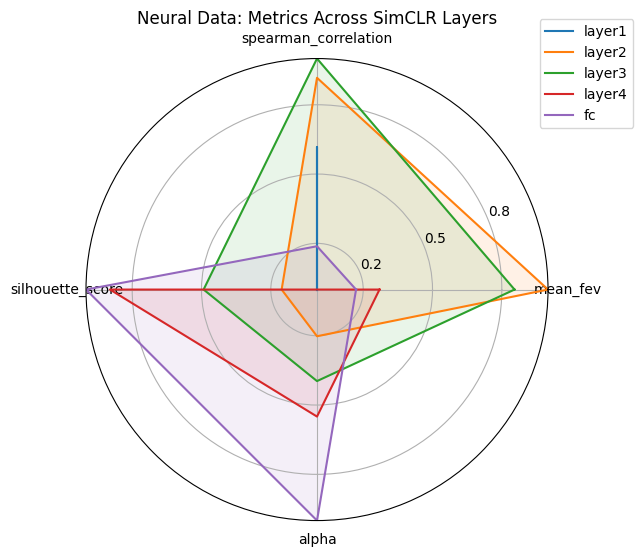

In [7]:
labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in avg_metrics_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Neural Data: Metrics Across SimCLR Layers")
plt.show()